In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
%matplotlib inline
khouse_train = pd.read_csv('kc_house_train_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
khouse_test = pd.read_csv('kc_house_test_data.csv',dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [29]:
def RSS(y,y_est):
    return ((y-y_est)**2).sum()


def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if feature_is_constant:
        derivative = -2*(errors*feature).sum()
    else:
        derivative = -2*(errors*feature).sum()+2*l2_penalty*weight
    return derivative

In [243]:
def set_data(features, output):
    df = pd.DataFrame(features).transpose()
    df['constant'] = 1
    df.set_axis([i for i in range(len(features)+1)],axis='columns',inplace=True)
    return (df, output)


def predict_output(feature_matrix, weights):
    return (feature_matrix*weights).sum(axis=1)


def feature_derivative(errors, feature):
    _ = -2*feature.transpose()*errors
    return _.sum(axis=1).reset_index()[0]


def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = initial_weights
    i=1
    while not converged:
        print("\n",i)
        i+=1
        print(weights[0],weights[1])
        
        prediction = predict_outcome(feature_matrix, weights)
        errors = output-prediction
        gradient_of_RSS = feature_derivative(errors, feature_matrix)
        print(gradient_of_RSS)
        
        weights = weights - step_size*gradient_of_RSS
        g_value = np.sqrt(np.square(gradient_of_RSS).sum())
        if g_value < tolerance:
            converged = True
    return weights
def feature_derivative_ridge(errors, feature, weights, l2_penalty):
    f = feature.loc[:,0:feature.shape[1]-2]
    constant = feature.loc[:,feature.shape[1]-1]
    derivative = (-2*pd.DataFrame.mul(f,errors,axis=0)).sum(axis=0)+2*l2_penalty*weights[0:-1]
    derivative[feature.shape[1]-1] = -2*(errors*constant).sum()
#     print(derivative)
    return derivative
    
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights)
    for i in range(max_iterations):
        prediction = predict_output(feature_matrix, weights)
        errors = output-prediction
        gradient = feature_derivative_ridge(errors, feature_matrix, weights, l2_penalty)
        weights = weights -step_size*gradient
#         print(weights)
    return weights

In [238]:
simple_features = [khouse_train['sqft_living']]
(simple_feature_matrix, simple_output) = set_data(simple_features, khouse_train['price'])

l2_penalty, step_size, max_iteration=0, 1e-12, 1000
initial_weights = pd.Series([0.,0.])
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, initial_weights, step_size, l2_penalty, max_iterations=100)

In [244]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, initial_weights, step_size, l2_penalty, max_iterations=100)

In [258]:
print(simple_weights_0_penalty)
print(simple_weights_high_penalty)

0    263.024271
1      0.078820
dtype: float64
0    124.573845
1      0.998079
dtype: float64


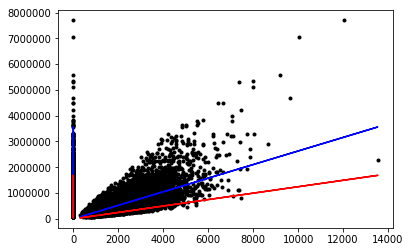

In [246]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,simple_output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [264]:
simple_features = [khouse_test['sqft_living']]
(simple_test_matrix, test_output) = set_data(simple_features, khouse_test['price'])

print(RSS(test_output, predict_output(simple_test_matrix, initial_weights)))
print('{:e}'.format(RSS(test_output, predict_output(simple_test_matrix, simple_weights_0_penalty))))
print('{:e}'.format(RSS(test_output, predict_output(simple_test_matrix, simple_weights_high_penalty))))

1784273286136298.0
2.757236e+14
6.946531e+14


In [266]:
simple_features = [khouse_train['sqft_living'], khouse_train['sqft_living15']]
(simple_feature_matrix, simple_output) = set_data(simple_features, khouse_train['price'])

l2_penalty, step_size, max_iteration=0.0, 1e-12, 1000
initial_weights = pd.Series([0., 0., 0.])
multiple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, initial_weights, step_size, l2_penalty, max_iterations=100)

l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, simple_output, initial_weights, step_size, l2_penalty, max_iterations=100)

print(multiple_weights_0_penalty)
print(multiple_weights_high_penalty)

0    187.808775
1     82.404682
2      0.001803
dtype: float64
0    91.490081
1    78.437403
2     0.694809
dtype: float64


In [265]:
simple_features = [khouse_test['sqft_living'], khouse_test['sqft_living15']]
(simple_test_matrix, test_output) = set_data(simple_features, khouse_test['price'])

print(RSS(test_output, predict_output(simple_test_matrix, initial_weights)))
print(RSS(test_output, predict_output(simple_test_matrix, multiple_weights_0_penalty)))
print('{:e}'.format(RSS(test_output, predict_output(simple_test_matrix, multiple_weights_high_penalty))))

1784273286136298.0
276002294253496.25
5.004081e+14


In [262]:
print(test_output[0]- predict_output(simple_test_matrix, multiple_weights_0_penalty)[0])
print(test_output[0]- predict_output(simple_test_matrix, multiple_weights_high_penalty)[0])

-105246.88440829347
39549.91208731104


## Notes:
Default:

pd.DataFrame * pd.DataFrame => 同column name相乘

pd.DataFrame * pd.Series => 以df的column name對 series的index

**但我們總是能用 pd.DataFrame.mul(a,b,axis={0,1}) 來指定**